<a href="https://colab.research.google.com/github/Darianna-dev/TELECOM-X-2/blob/main/TelecomX_LATAM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
datos_json = "/content/drive/MyDrive/ALURA LATAM (ONE)/CHALLENGE-TELECOM-X/Archivos_TelecomX/TelecomX_Data.json"
datos = pd.read_json(datos_json)
datos.sample(3)

,customerID,Churn,customer,phone,internet,account
3051,4248-QPAVC,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4385,6007-TCTST,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
5162,7044-YAACC,No,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
# Aplanamos cada columna JSON por separado
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

In [7]:
# Se une todo en un solo DataFrame
datos = pd.concat([datos[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

datos.sample(3)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
2088,2931-VUVJN,No,Female,1,Yes,No,59,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,No,No,One year,Yes,Electronic check,94.05,5483.9
5910,8070-AAWZP,No,Male,1,Yes,No,24,No,No phone service,DSL,...,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,34.25,828.2
6701,9227-UAQFT,No,Male,0,No,No,16,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.75,284.35


In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
datos['Charges.Total'] = datos['Charges.Total'].replace(r'^\s*$', np.nan, regex=True)  # Reemplaza cualquier tipo de string vacío, con espacios o tabs por NaN
datos['Charges.Total'] = pd.to_numeric(datos['Charges.Total'], errors='coerce')   # Convierte a numérico, forzando errores a NaN

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
# print(datos['Charges.Total'].unique())
print(datos['Charges.Total'].isna().sum())

11


In [11]:
print('Ver cantidad de valores nulos por columna')
print(datos.isnull().sum())
print('-------------------------------------------')
print('Ver porcentaje de valores nulos por columna')
print(datos.isnull().sum() * 100 /len(datos))
print('-------------------------------------------')


Ver cantidad de valores nulos por columna
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64
-------------------------------------------
Ver porcentaje de valores nulos por columna
customerID          0.000000
Churn               0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.0000

In [12]:
# Se eliminan las filas donde 'Charges.Total' es NaN
datos.dropna(subset=['Charges.Total'], inplace=True)
print(datos.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [13]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contract          7256 non-null   object 
 17  

In [14]:
columnas = datos.columns
columnas

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [15]:
# Convertir nombres de columnas en minusculas y a snake_case
datos.columns = datos.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_', regex=False)
datos.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges_monthly',
       'charges_total'],
      dtype='object')

In [16]:
for columna in datos.columns:
    if datos[columna].dtype == 'object':
        print(datos[columna].unique())

['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
['No' 'Yes' '']
['Female' 'Male']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes' 'No phone service']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['One year' 'Month-to-month' 'Two year']
['Yes' 'No']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [17]:
datos.describe(include='O')

,customerid,churn,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
count,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,7256,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5163,3669,3747,5086,6551,3490,3198,3607,3181,3194,3581,2895,2866,4005,4308,2445


In [18]:
datos['churn'] = datos['churn'].replace('', np.nan)
print(datos['churn'].value_counts())
print(datos['churn'].isnull().sum())

churn
No     5163
Yes    1869
Name: count, dtype: int64
224


In [19]:
datos = datos[datos['churn'].notnull()].copy()
# datos.dropna(subset=['churn'], inplace=True)
print(datos['churn'].value_counts())
print(datos['churn'].isnull().sum())

churn
No     5163
Yes    1869
Name: count, dtype: int64
0


In [20]:
# Resetear el índice
datos.reset_index(drop=True, inplace=True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   object 
 5   dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   object 
 8   multiplelines     7032 non-null   object 
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   object 
 11  onlinebackup      7032 non-null   object 
 12  deviceprotection  7032 non-null   object 
 13  techsupport       7032 non-null   object 
 14  streamingtv       7032 non-null   object 
 15  streamingmovies   7032 non-null   object 
 16  contract          7032 non-null   object 


In [21]:
# Convertir a minúsculas
datos['contract'] = datos['contract'].str.strip().str.lower().str.replace('month-to-month', 'month_to_month').str.replace('one year','one_year').str.replace('two year','two_year')
datos['contract'].sample(3)

,contract
4900,month_to_month
2301,month_to_month
941,month_to_month


In [22]:
for col in datos.select_dtypes(include='object').columns:
    datos[col] = datos[col].str.strip().str.title()
    print(f"Unique values in '{col}':")
    print(datos[col].unique())
    print('---------------------------------')

Unique values in 'customerid':
['0002-Orfbo' '0003-Mknfe' '0004-Tlhlj' ... '9992-Ujoel' '9993-Lhieb'
 '9995-Hotoh']
---------------------------------
Unique values in 'churn':
['No' 'Yes']
---------------------------------
Unique values in 'gender':
['Female' 'Male']
---------------------------------
Unique values in 'partner':
['Yes' 'No']
---------------------------------
Unique values in 'dependents':
['Yes' 'No']
---------------------------------
Unique values in 'phoneservice':
['Yes' 'No']
---------------------------------
Unique values in 'multiplelines':
['No' 'Yes' 'No Phone Service']
---------------------------------
Unique values in 'internetservice':
['Dsl' 'Fiber Optic' 'No']
---------------------------------
Unique values in 'onlinesecurity':
['No' 'Yes' 'No Internet Service']
---------------------------------
Unique values in 'onlinebackup':
['Yes' 'No' 'No Internet Service']
---------------------------------
Unique values in 'deviceprotection':
['No' 'Yes' 'No Internet 

In [23]:
# datos['ternure_days'] = datos['tenure'] * 30

In [24]:
datos['cuentas_diarias'] = datos['charges_total'] / (datos['tenure'] * 30)
datos.head(3)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
0,0002-Orfbo,No,Female,0,Yes,Yes,9,Yes,No,Dsl,...,No,Yes,Yes,No,One_Year,Yes,Mailed Check,65.6,593.30,2.197407
1,0003-Mknfe,No,Male,0,No,No,9,Yes,Yes,Dsl,...,No,No,No,Yes,Month_To_Month,No,Mailed Check,59.9,542.40,2.008889
2,0004-Tlhlj,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,...,Yes,No,No,No,Month_To_Month,Yes,Electronic Check,73.9,280.85,2.340417


In [25]:
print(datos['cuentas_diarias'].info())
print('------------------------------------------')
print(datos['cuentas_diarias'].isnull().sum())
print('------------------------------------------')

<class 'pandas.core.series.Series'>
RangeIndex: 7032 entries, 0 to 7031
Series name: cuentas_diarias
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB
None
------------------------------------------
0
------------------------------------------


In [26]:
datos.replace({
    "No Phone Service": "No",
    "No Internet Service": "No"
    },
    inplace=True)

In [27]:
datos.sample(3)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
6105,8660-Buetv,No,Female,0,No,No,3,Yes,No,Dsl,...,No,No,No,No,Month_To_Month,No,Mailed Check,44.75,148.05,1.645000
6626,9435-Jmlsx,No,Male,0,Yes,No,71,Yes,No,Dsl,...,Yes,Yes,Yes,Yes,Two_Year,Yes,Bank Transfer (Automatic),86.10,6045.90,2.838451
5757,8111-Bkvds,No,Female,0,No,No,10,No,No,Dsl,...,Yes,No,No,No,Month_To_Month,No,Bank Transfer (Automatic),40.70,449.30,1.497667


In [28]:
# Diccionario de mapeo
mapeo = {'Yes': 1, 'No': 0}

# Aplicar a columnas relevantes
cols_a_binarias = ['partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity',
                   'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies','paperlessbilling']

for col in cols_a_binarias:
  if col in datos.columns and datos[col].dtype == 'object':
    datos[col] = datos[col].map(mapeo)

datos.sample(3)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
5155,7268-Igmfd,No,Male,1,0,0,18,1,1,Fiber Optic,...,1,1,1,0,Month_To_Month,0,Bank Transfer (Automatic),93.9,1743.9,3.229444
6851,9747-Ddzos,Yes,Female,0,0,0,1,1,0,Fiber Optic,...,1,0,0,0,Month_To_Month,0,Bank Transfer (Automatic),73.5,73.5,2.450000
248,0376-Ymcjc,Yes,Male,0,0,0,23,1,1,Fiber Optic,...,0,1,1,0,Month_To_Month,1,Electronic Check,90.6,1943.2,2.816232


In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   int64  
 5   dependents        7032 non-null   int64  
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   int64  
 8   multiplelines     7032 non-null   int64  
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   int64  
 11  onlinebackup      7032 non-null   int64  
 12  deviceprotection  7032 non-null   int64  
 13  techsupport       7032 non-null   int64  
 14  streamingtv       7032 non-null   int64  
 15  streamingmovies   7032 non-null   int64  
 16  contract          7032 non-null   object 


#📊 Carga y análisis

In [30]:
datos.describe()

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges_monthly,charges_total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.159981
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,1.006196
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.459167
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.205996
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345775
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,3.005985
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,4.046667


In [31]:
datos = datos.drop(columns='customerid', axis=1)
datos.head(3)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
0,No,Female,0,1,1,9,1,0,Dsl,0,...,0,1,1,0,One_Year,1,Mailed Check,65.6,593.30,2.197407
1,No,Male,0,0,0,9,1,1,Dsl,0,...,0,0,0,1,Month_To_Month,0,Mailed Check,59.9,542.40,2.008889
2,Yes,Male,0,0,0,4,1,0,Fiber Optic,0,...,1,0,0,0,Month_To_Month,1,Electronic Check,73.9,280.85,2.340417


In [32]:
# Columnas categóricas
print('--------------------------------Columnas categóricas------------------------------------------')
columnas_categoricas = datos.select_dtypes(include='object').columns
print(columnas_categoricas)

# Columnas numéricas
print('--------------------------------Columnas numéricas------------------------------------------')
columnas_numericas = ['tenure', 'charges_monthly', 'charges_total', 'cuentas_diarias']
print(columnas_numericas)
# Columnas binarias

print('-------------------------------Columnas binarias-------------------------------------------')
columnas_binarias = ['churn', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity',
                   'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies','paperlessbilling']
print(columnas_binarias)

--------------------------------Columnas categóricas------------------------------------------
Index(['churn', 'gender', 'internetservice', 'contract', 'paymentmethod'], dtype='object')
--------------------------------Columnas numéricas------------------------------------------
['tenure', 'charges_monthly', 'charges_total', 'cuentas_diarias']
-------------------------------Columnas binarias-------------------------------------------
['churn', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling']


In [33]:
# df['churn'] = df['churn'].map(mapeo)
# df.sample(3)
datos.head(3)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
0,No,Female,0,1,1,9,1,0,Dsl,0,...,0,1,1,0,One_Year,1,Mailed Check,65.6,593.30,2.197407
1,No,Male,0,0,0,9,1,1,Dsl,0,...,0,0,0,1,Month_To_Month,0,Mailed Check,59.9,542.40,2.008889
2,Yes,Male,0,0,0,4,1,0,Fiber Optic,0,...,1,0,0,0,Month_To_Month,1,Electronic Check,73.9,280.85,2.340417


In [34]:
churn_counts = datos['churn'].value_counts()
print(churn_counts)

churn
No     5163
Yes    1869
Name: count, dtype: int64


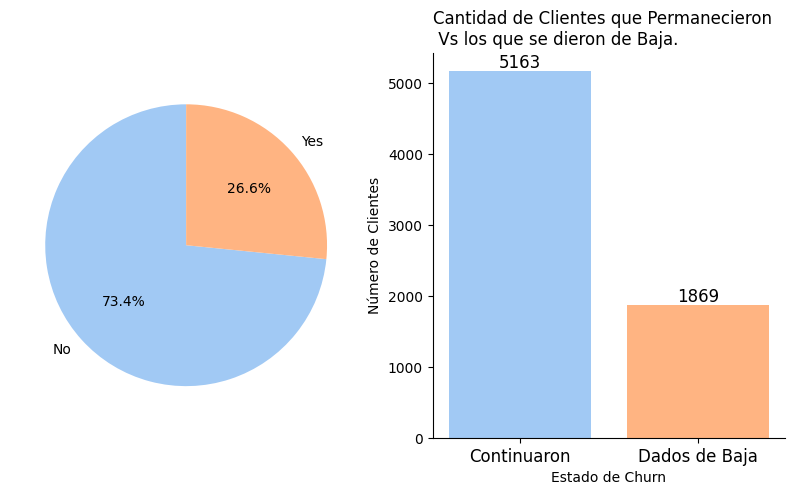

In [35]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

# Primer Gráfico de Pie
ax[0].pie(
    churn_counts.values,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel"),
    # wedgeprops=dict(width=0.5)
)

# Segudo Gráfico de Barras
ax[1].bar(x=churn_counts.index, height=churn_counts.values, color=sns.color_palette("pastel"))
ax[1].set_title('Cantidad de Clientes que Permanecieron\n Vs los que se dieron de Baja.', loc='left')
ax[1].set_xlabel('Estado de Churn')
ax[1].set_ylabel('Número de Clientes')


ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].set_xticks([0, 1], ['Continuaron', 'Dados de Baja'])

for i, value in enumerate(churn_counts.values):
    ax[1].text(i, value + 50, str(value), ha='center', fontsize=12)

plt.show()

## Recuento de evasión por variables categóricas

In [36]:
def plot_churn_por_categoria(df, columna):
    plt.figure(figsize=(10,6))
    prop = pd.crosstab(datos[columna], df['churn'], normalize='index')
    prop.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"))
    plt.title(f'Proporción de churn según {columna}')
    plt.ylabel('Proporción')
    plt.xlabel(columna)
    plt.legend(['Permanecen', 'Se dieron de baja'], loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [37]:
def plot_grouped_churn(df, columna):
    plt.figure(figsize=(10,6))
    prop = pd.crosstab(df[columna], df['churn'])
    prop.plot(kind='bar',  color=sns.color_palette("pastel"))
    plt.title(f'Proporción de churn según {columna}')
    plt.ylabel('Proporción')
    plt.xlabel(columna)
    plt.legend(['Permanecen', 'Se dieron de baja'], loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Figure size 1000x600 with 0 Axes>

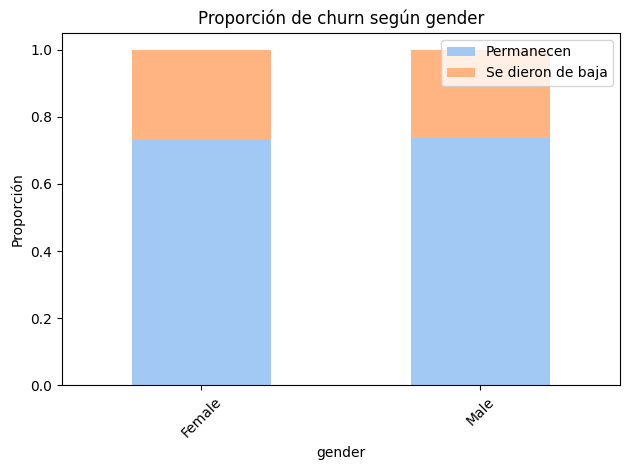

<Figure size 1000x600 with 0 Axes>

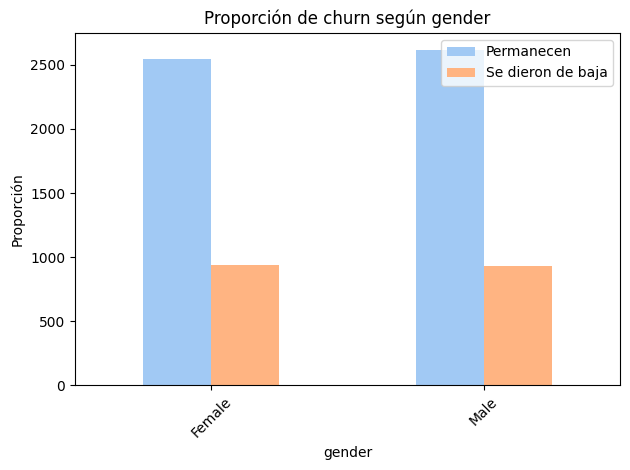

<Figure size 1000x600 with 0 Axes>

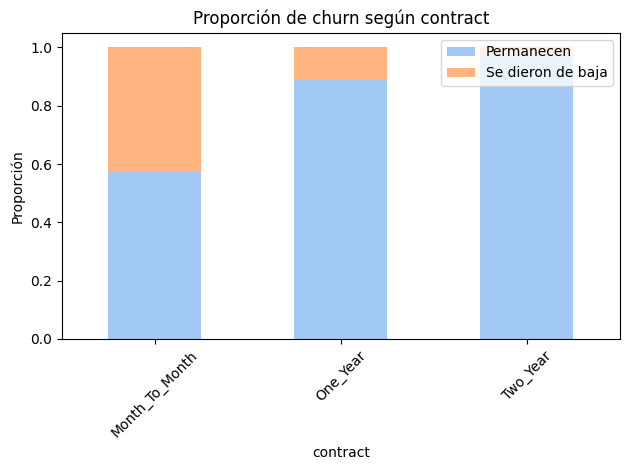

<Figure size 1000x600 with 0 Axes>

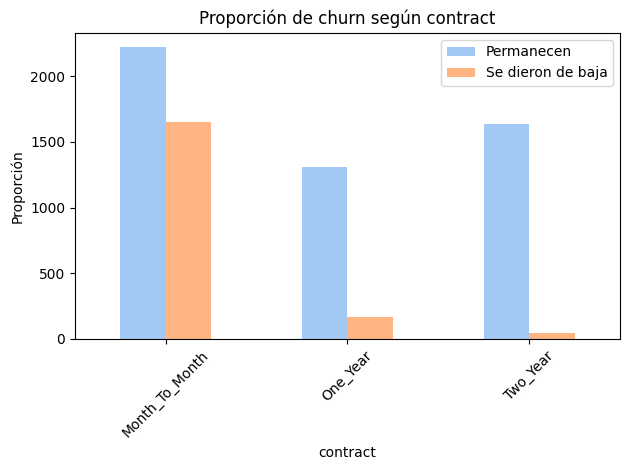

<Figure size 1000x600 with 0 Axes>

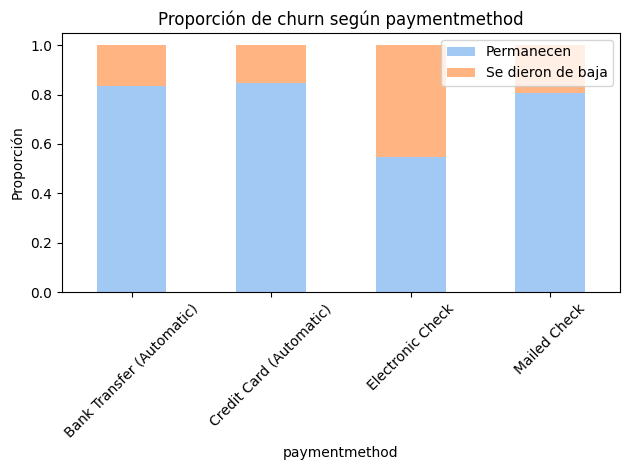

<Figure size 1000x600 with 0 Axes>

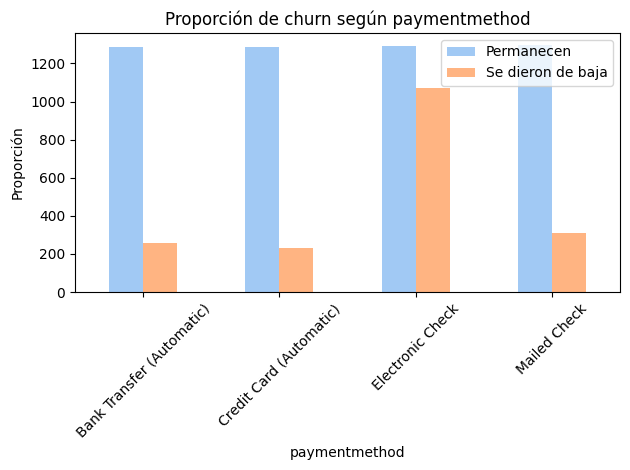

<Figure size 1000x600 with 0 Axes>

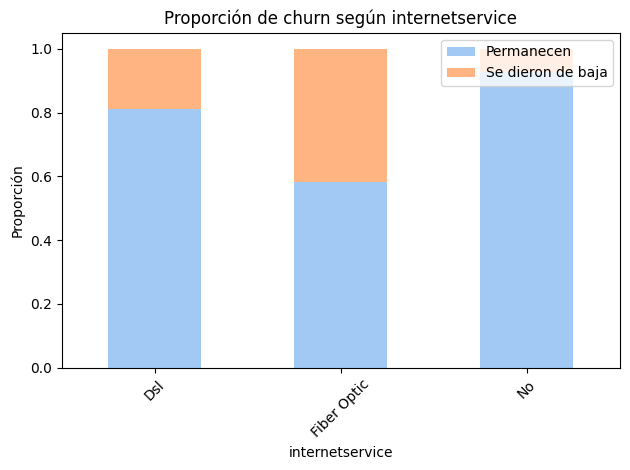

<Figure size 1000x600 with 0 Axes>

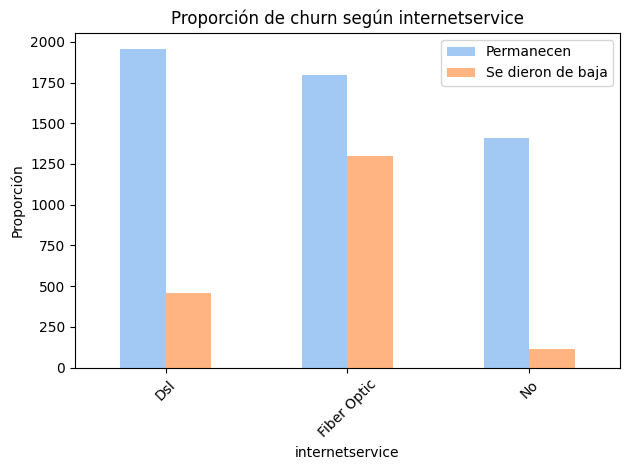

<Figure size 1000x600 with 0 Axes>

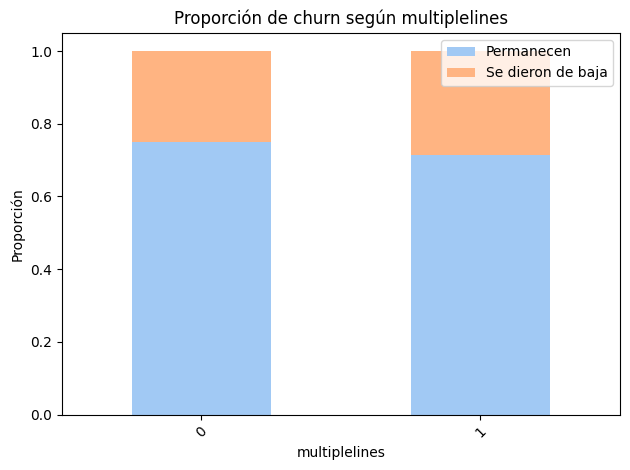

<Figure size 1000x600 with 0 Axes>

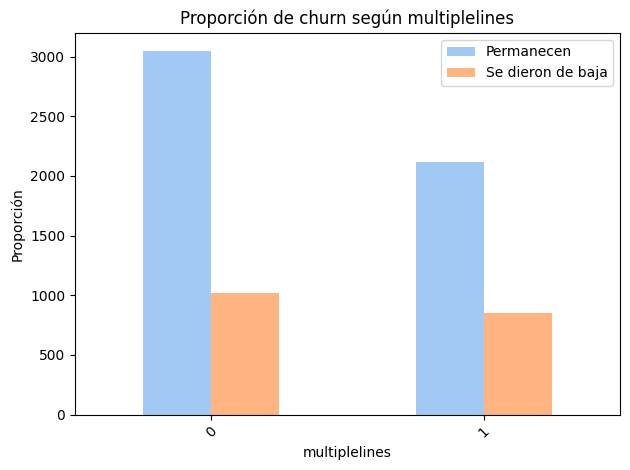

In [38]:
# Lista de variables categóricas a analizar
categoricas = ['gender', 'contract', 'paymentmethod', 'internetservice', 'multiplelines']

for col in categoricas:
    plot_churn_por_categoria(datos, col)
    plot_grouped_churn(datos, col)

## Conteo de evasión por variables numéricas


In [39]:
def plot_numeric_vs_churn(df, numeric_column):

    plt.figure(figsize=(10,6))
    sns.boxplot(
    y='churn',  # variable categórica (eje Y ahora)
    x=numeric_column,  # variable numérica (eje X)
    data=df,
    orient='h',
    palette=sns.color_palette("pastel")
)
    # sns.boxplot(x='churn', y=numeric_column, data=df, palette='Set2')
    plt.title(f'{numeric_column} vs Churn')
    plt.xlabel('Churn (0 = permanece, 1 = se dio de baja)')
    plt.ylabel(numeric_column)
    plt.xticks([0,1], ['Permanecen', 'Se dieron de baja'])
    plt.tight_layout()
    plt.show()

In [40]:
def plot_histogram_by_churn(df, column):
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=column, hue='churn', kde=True, element='step', stat='density', palette=sns.color_palette("pastel"))
    # sns.histplot(data=df, x=column, hue='churn', kde=True, element='step', stat='density', palette='Set2')
    plt.title(f'Distribución de {column} por churn')
    plt.xlabel(column)
    plt.ylabel('Densidad')
    plt.tight_layout()
    plt.show()

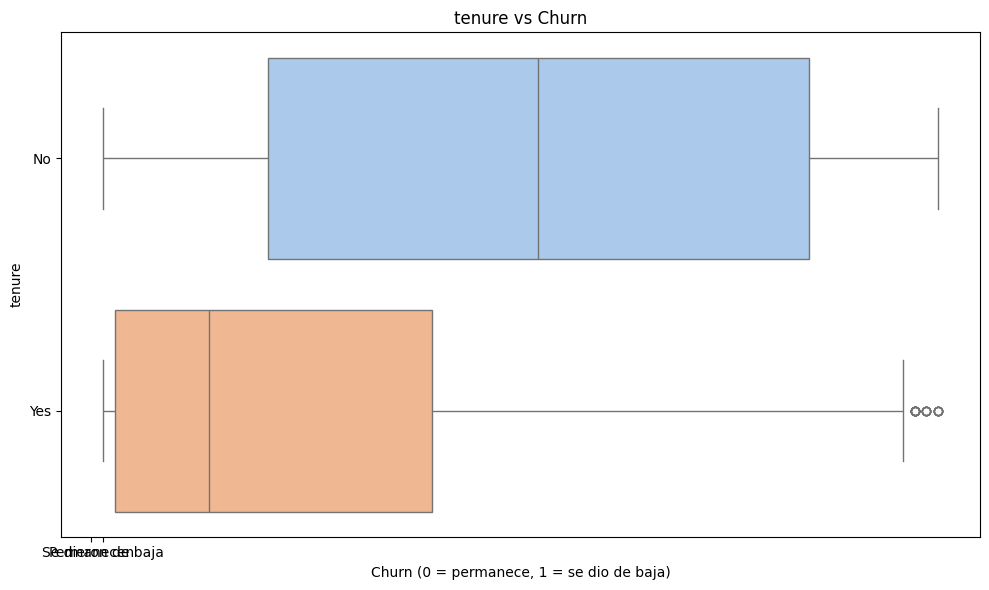

-----------------------------------------------------------


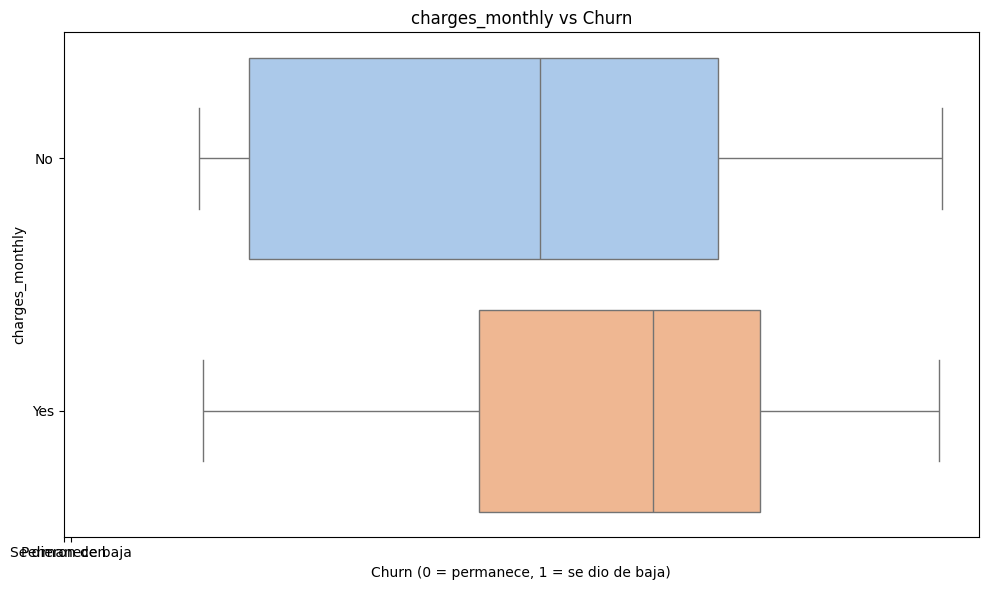

-----------------------------------------------------------


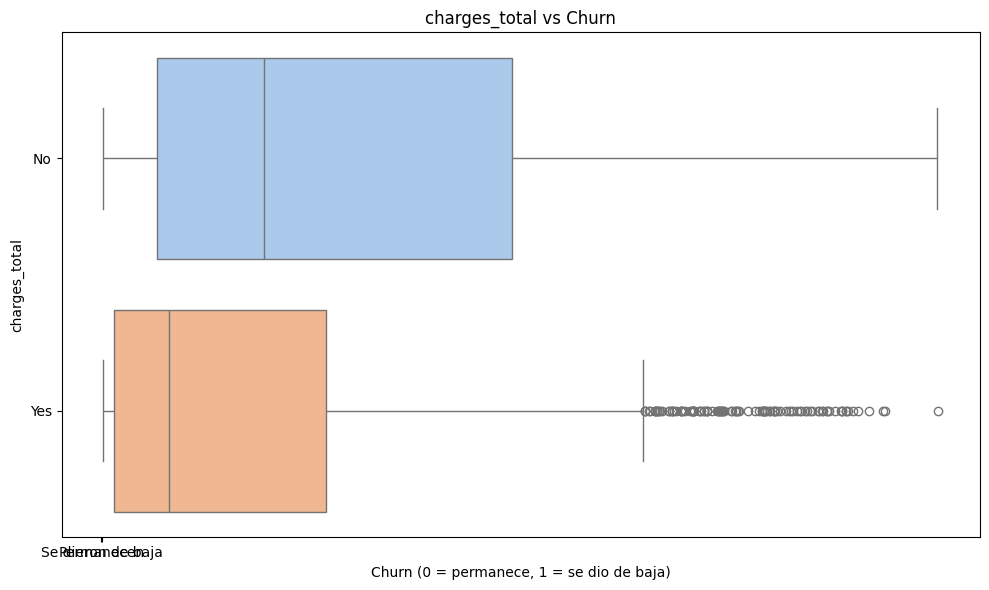

-----------------------------------------------------------


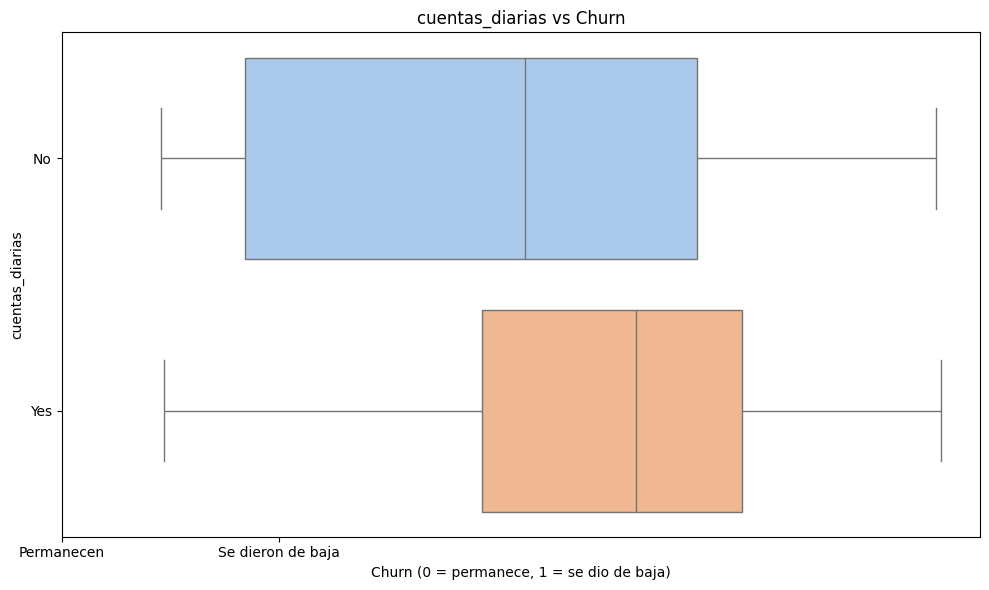

-----------------------------------------------------------


In [41]:
for col in columnas_numericas:
    plot_numeric_vs_churn(datos, col)
    # plot_histogram_by_churn(df, col)
    print('-----------------------------------------------------------')

#📄Informe final

##  🔍 1. Introducción

Este análisis busca identificar los patrones que explican el abandono de clientes (churn) en el sector de telecomunicaciones.
El churn representa una amenaza clave para la retención, al reflejar la pérdida de usuarios activos.
Detectar los factores asociados permite tomar decisiones informadas.
Esto facilita mejorar la experiencia del cliente y reducir la rotación.

## 🧹 2. Limpieza y Tratamiento de Datos

Se cargaron los datos desde un archivo .json (TelecomX_Data.json) usando pandas. Las variables incluyen información demográfica, servicios contratados, duración del contrato y cargos mensuales y totales entre otros.

🧺 Pasos de limpieza realizados:

- Se Aplanó cada columna del diccionrio.
- Se convirtieron variables categóricas a tipo category.
- Se creó una variable binaria llamada "cols_a_binarias"  para facilitar cálculos posteriores ('Yes' → 1, 'No' → 0).
- Se verificó la ausencia de valores nulos.
- Se trató datos duplicados.

## 📈 Variables numéricas procesadas:

- tenure: Meses con la compañía.
- charges_monthly: Cargo mensual.
- charges_total: Total acumulado pagado.
- tenure_days: Tiempo en días (derivado).
- cuentas_diarias: Para calcular el valor diario.

## 📊 3. Análisis Exploratorio de Datos


### 📌 Distribución general del Churn

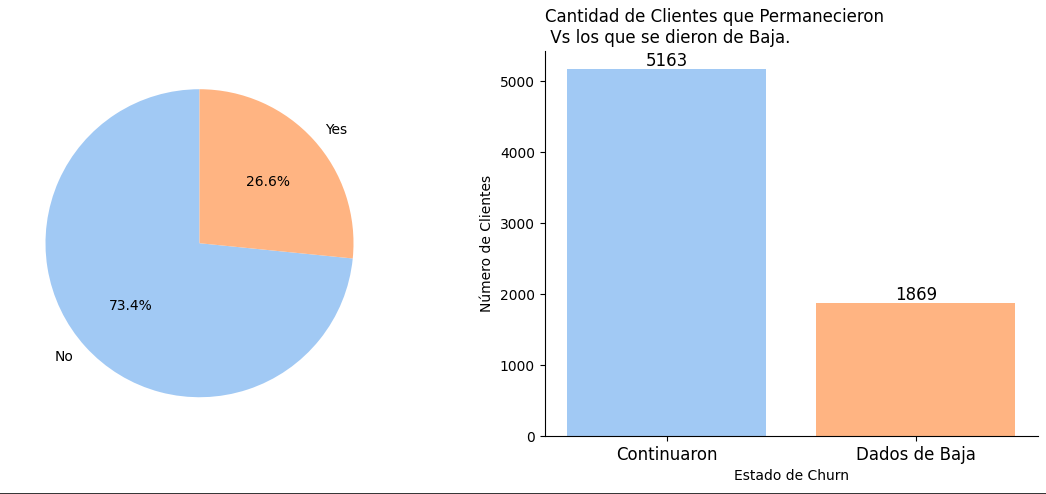

### 📃📈 **Análisis:** Un 26.6% de los clientes analizados han abandonado el servicio.

### 📌📌 Por tipo de contrato:

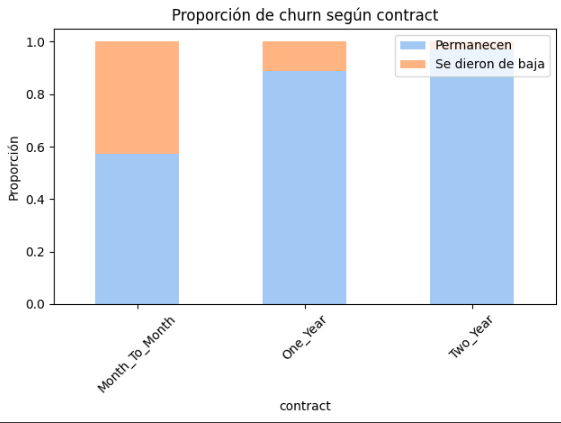


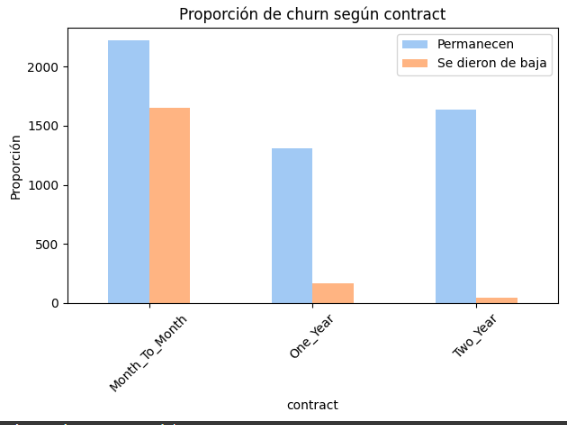

### 📃📈 Análisis:  Los clientes con contrato mensual tienen una tasa de abandono mucho mayor que quienes tienen contratos anuales o bienales.

---

## 📝 4. Conclusiones e Insights

### 📌 Principales hallazgos:

### 1. Los contratos mensuales tienen mayor churn.
- Indican menor compromiso por parte del cliente.
- Representa un grupo prioritario para acciones de fidelización.


### 2. Clientes nuevos tienden a irse antes.
- Baja tenure está correlacionada con abandono temprano.
- Requiere atención durante las primeras semanas/meses.

### 3. Altos cargos mensuales sin valor percibido aumentan el riesgo de churn.
- Puede ser un síntoma de mala percepción del servicio o falta de personalización.

### 4. Método de pago automático reduce el abandono.
- Facilita la continuidad del servicio.
- Puede usarse como incentivo para fidelizar.


## 🚀 5. Recomendaciones

### 1. Ofrecer descuentos por contratos anuales o bienales
- Incentivar el cambio de contrato mensual a largo plazo.
- Ejemplo: regalo de meses adicionales o bonificaciones.

### 2. Programa de onboarding para nuevos clientes
- Mejorar la primera experiencia para reducir abandono temprano.
- Ofrecer guías, soporte técnico inicial o beneficios iniciales.

### 3. Segmentación por gasto mensual
- Ofrecer planes alternativos o paquetes premium a clientes de alto valor.
- Personalizar ofertas para evitar que clientes de alto costo se vayan.

### 4. Promoción de pago automático
- Beneficios exclusivos para clientes con pago automático (ej. descuentos, acceso a contenido adicional).

### 5. Monitoreo proactivo de clientes de alto riesgo
- Implementar modelos predictivos para identificar clientes con alta probabilidad de abandonar.
- Contactarlos antes de que tomen la decisión final.

## ✅ Conclusión

  Este análisis exploratorio ha permitido identificar patrones claros que explican el comportamiento de los clientes frente al abandono. Con esta información, se pueden diseñar estrategias efectivas para disminuir el churn , incrementar la retención y mejorar la rentabilidad a largo plazo.

---

# Segunda Parte:

## 🛠️ Preparación de los Datos

### Variables Categóricas


In [42]:
import plotly.express as px

In [43]:
print(columnas_categoricas)
print(columnas_numericas)
print(columnas_binarias)

Index(['churn', 'gender', 'internetservice', 'contract', 'paymentmethod'], dtype='object')
['tenure', 'charges_monthly', 'charges_total', 'cuentas_diarias']
['churn', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling']


In [44]:
px.histogram(datos, x='churn', text_auto=True, color='churn')


In [45]:
px.histogram(datos, x='gender', text_auto=True, color='churn', barmode='group')

In [46]:
px.histogram(datos, x='internetservice', text_auto=True, color='churn', barmode='group')

In [47]:
px.histogram(datos, x='contract', text_auto=True, color='churn', barmode='group')

In [48]:
px.histogram(datos, x='paymentmethod', text_auto=True, color='churn', barmode='group')

### Variables Numéricas

In [49]:
px.box(datos, x='tenure', color='churn')

In [50]:
px.box(datos, x='charges_monthly', color='churn')

In [51]:
px.box(datos, x='charges_total', color='churn')

In [52]:
px.box(datos, x='cuentas_diarias', color='churn')

In [53]:
columnas_numericas=['tenure', 'charges_monthly', 'charges_total', 'cuentas_diarias', 'n_servicios']

In [54]:
datos.head(5)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
0,No,Female,0,1,1,9,1,0,Dsl,0,...,0,1,1,0,One_Year,1,Mailed Check,65.6,593.30,2.197407
1,No,Male,0,0,0,9,1,1,Dsl,0,...,0,0,0,1,Month_To_Month,0,Mailed Check,59.9,542.40,2.008889
2,Yes,Male,0,0,0,4,1,0,Fiber Optic,0,...,1,0,0,0,Month_To_Month,1,Electronic Check,73.9,280.85,2.340417
3,Yes,Male,1,1,0,13,1,0,Fiber Optic,0,...,1,0,1,1,Month_To_Month,1,Electronic Check,98.0,1237.85,3.173974
4,Yes,Female,1,1,0,3,1,0,Fiber Optic,0,...,0,1,1,0,Month_To_Month,1,Mailed Check,83.9,267.40,2.971111


### Aplicando OneHotEncoding

In [55]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

Transformación de las Variables Explicativas


In [56]:
columnas = datos.columns
columnas

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total', 'cuentas_diarias'],
      dtype='object')

In [57]:
datos.sample(4)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
3157,Yes,Male,0,0,0,7,1,0,No,0,...,0,0,0,0,Month_To_Month,0,Electronic Check,19.25,112.3,0.534762
1088,Yes,Male,0,0,0,17,1,0,Dsl,0,...,0,1,0,0,Month_To_Month,0,Mailed Check,51.50,900.5,1.765686
5912,Yes,Male,1,1,0,10,1,1,Fiber Optic,0,...,1,0,0,1,Month_To_Month,1,Electronic Check,89.80,914.3,3.047667
3418,No,Male,0,1,1,2,1,0,Dsl,1,...,0,1,0,0,Two_Year,0,Mailed Check,59.50,130.5,2.175000


In [58]:
datos['internetservice'].sample(5)

,internetservice
5304,Dsl
5442,Dsl
1304,Dsl
423,Dsl
6814,Fiber Optic


In [59]:
columnas_categoricas = datos.select_dtypes(include='object').columns.tolist()
columnas_categoricas

['churn', 'gender', 'internetservice', 'contract', 'paymentmethod']

In [60]:
columnas_transformar = ['gender', 'internetservice', 'contract', 'paymentmethod']

In [61]:
for col in datos.columns:
    tipos = datos[col].map(type).nunique()
    if tipos > 1:
        print(f"Columna '{col}' tiene tipos mezclados")

In [62]:
# datos_codificados_1 = pd.get_dummies(datos, drop_first=True, dtype=int)
datos_codificados = pd.get_dummies(datos, columns=columnas_transformar, drop_first=True, dtype=int)
datos_codificados.head(3)
# datos_codificados_1.head(3)

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,charges_total,cuentas_diarias,gender_Male,internetservice_Fiber Optic,internetservice_No,contract_One_Year,contract_Two_Year,paymentmethod_Credit Card (Automatic),paymentmethod_Electronic Check,paymentmethod_Mailed Check
0,No,0,1,1,9,1,0,0,1,0,...,593.30,2.197407,0,0,0,1,0,0,0,1
1,No,0,0,0,9,1,1,0,0,0,...,542.40,2.008889,1,0,0,0,0,0,0,1
2,Yes,0,0,0,4,1,0,0,0,1,...,280.85,2.340417,1,1,0,0,0,0,1,0


In [63]:
datos_codificados.replace({'Yes': 1, 'No': 0}, inplace=True)
datos_codificados.sample(3)

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,charges_total,cuentas_diarias,gender_Male,internetservice_Fiber Optic,internetservice_No,contract_One_Year,contract_Two_Year,paymentmethod_Credit Card (Automatic),paymentmethod_Electronic Check,paymentmethod_Mailed Check
4154,0,0,1,1,58,1,1,0,0,1,...,5563.65,3.197500,1,1,0,0,1,0,0,0
1839,0,0,0,0,53,1,0,0,0,0,...,978.00,0.615094,1,0,1,0,1,0,0,0
6126,0,0,0,0,1,1,0,1,0,0,...,51.25,1.708333,1,0,0,0,0,0,0,1


### Verificación de la Proporción de Cancelación (Churn)

In [64]:
conteo_churn = datos_codificados['churn'].value_counts()
proporcion_churn = datos_codificados['churn'].value_counts(normalize=True)

In [65]:
# Mostrar resultados
print("🔢 Conteo de clientes:")
print(conteo_churn)

print("\n📊 Proporción de clases:")
print(proporcion_churn)

🔢 Conteo de clientes:
churn
0    5163
1    1869
Name: count, dtype: int64

📊 Proporción de clases:
churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


## 🎯 Correlación y Selección de Variables

In [66]:
datos_codificados.corr()

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,charges_total,cuentas_diarias,gender_Male,internetservice_Fiber Optic,internetservice_No,contract_One_Year,contract_Two_Year,paymentmethod_Credit Card (Automatic),paymentmethod_Electronic Check,paymentmethod_Mailed Check
churn,1.000000,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.040033,-0.171270,-0.082307,-0.066193,...,-0.199484,0.192033,-0.008545,0.307463,-0.227578,-0.178225,-0.301552,-0.134687,0.301455,-0.090773
seniorcitizen,0.150541,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,...,0.102411,0.217616,-0.001819,0.254923,-0.182519,-0.046491,-0.116205,-0.024359,0.171322,-0.152987
partner,-0.149982,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,...,0.319072,0.097130,-0.001379,0.001235,-0.000286,0.083067,0.247334,0.082327,-0.083207,-0.096948
dependents,-0.163128,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,...,0.064653,-0.112481,0.010349,-0.164101,0.138383,0.069222,0.201699,0.061134,-0.149274,0.056448
tenure,-0.354049,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,...,0.825880,0.246198,0.005285,0.017930,-0.037529,0.202338,0.563801,0.232800,-0.210197,-0.232181
phoneservice,0.011691,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,...,0.113008,0.247900,-0.007515,0.290183,0.171817,-0.003142,0.004442,-0.006916,0.002747,-0.004463
multiplelines,0.040033,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,...,0.469042,0.489786,-0.008883,0.366420,-0.210794,-0.003594,0.106618,0.060319,0.083583,-0.227672
onlinesecurity,-0.171270,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,...,0.412619,0.296768,-0.016328,-0.030506,-0.332799,0.100658,0.191698,0.115473,-0.112295,-0.079918
onlinebackup,-0.082307,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,...,0.510100,0.439505,-0.013093,0.165940,-0.380990,0.084113,0.111391,0.090455,-0.000364,-0.174075
deviceprotection,-0.066193,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,...,0.522881,0.481759,-0.000807,0.176356,-0.380151,0.102911,0.165248,0.111252,-0.003308,-0.187325


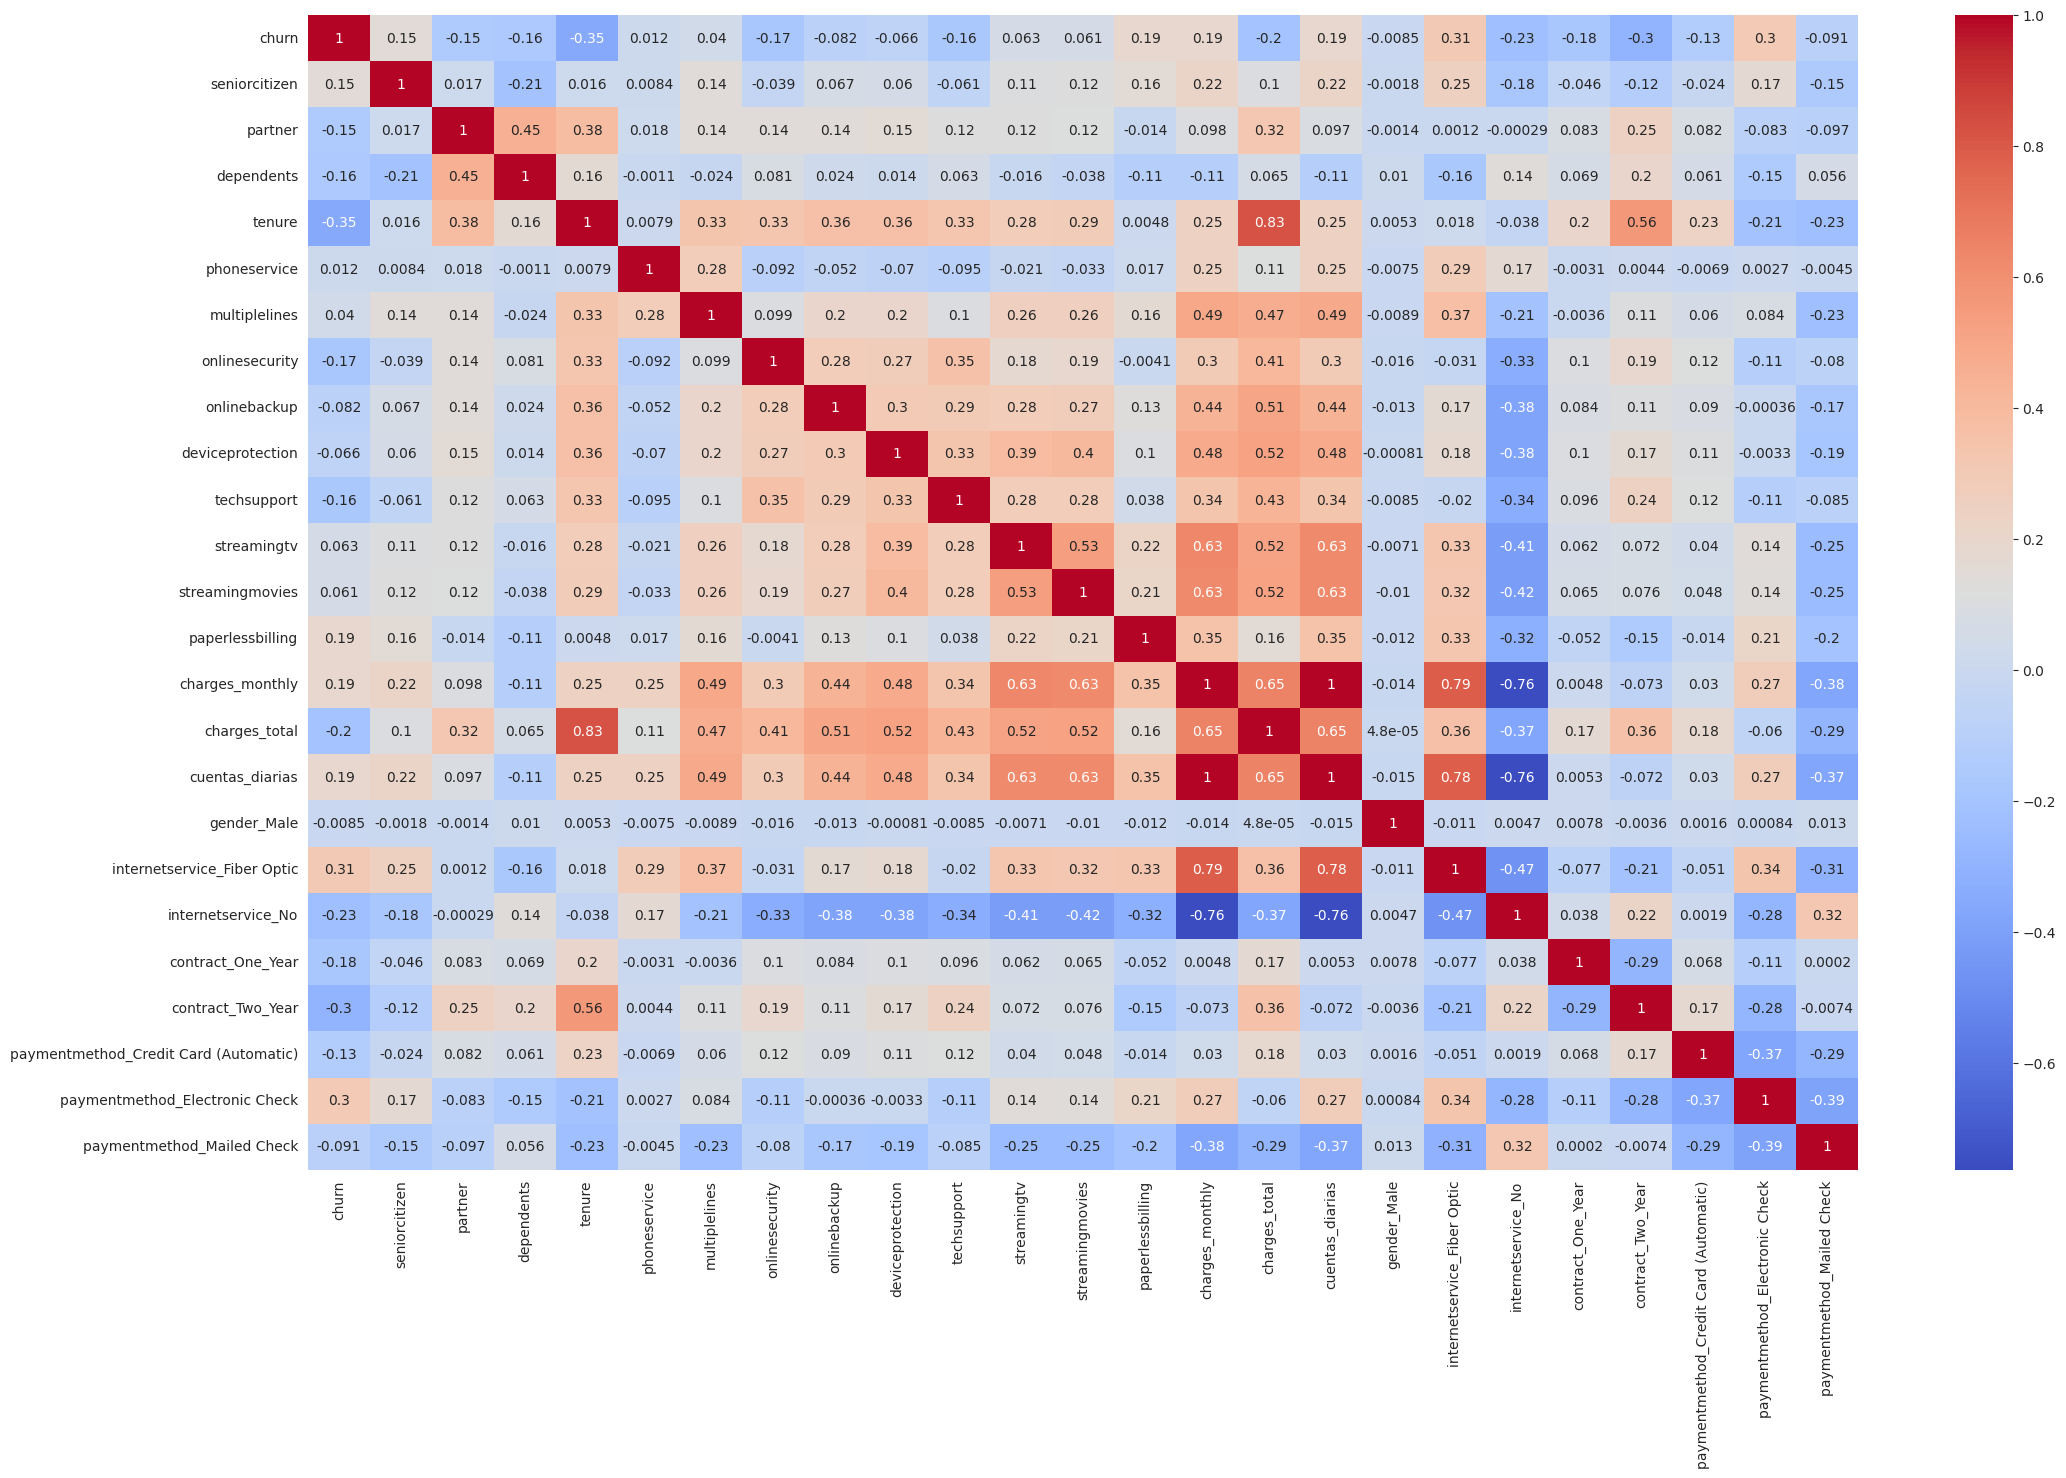

In [67]:
sns.set({'figure.figsize':(25,15)})
sns.heatmap(datos_codificados.corr(), annot=True, cmap='coolwarm')
plt.show()

In [68]:
datos_codificados[['cuentas_diarias', 'charges_monthly']].corr()

,cuentas_diarias,charges_monthly
cuentas_diarias,1.000000,0.996237
charges_monthly,0.996237,1.000000


In [69]:
# datos_codificados.corr()['churn'].sort_values(ascending=False)

In [70]:
# Extraer correlaciones con churn (excluyendo churn con sí mismo)
correlationes = datos_codificados.corr()['churn'].drop('churn').sort_values(key=abs, ascending=False)
print(correlationes)

tenure                                  -0.354049
internetservice_Fiber Optic              0.307463
contract_Two_Year                       -0.301552
paymentmethod_Electronic Check           0.301455
internetservice_No                      -0.227578
charges_total                           -0.199484
charges_monthly                          0.192858
cuentas_diarias                          0.192033
paperlessbilling                         0.191454
contract_One_Year                       -0.178225
onlinesecurity                          -0.171270
techsupport                             -0.164716
dependents                              -0.163128
seniorcitizen                            0.150541
partner                                 -0.149982
paymentmethod_Credit Card (Automatic)   -0.134687
paymentmethod_Mailed Check              -0.090773
onlinebackup                            -0.082307
deviceprotection                        -0.066193
streamingtv                              0.063254


In [71]:
datos_codificados.head(3)

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,charges_total,cuentas_diarias,gender_Male,internetservice_Fiber Optic,internetservice_No,contract_One_Year,contract_Two_Year,paymentmethod_Credit Card (Automatic),paymentmethod_Electronic Check,paymentmethod_Mailed Check
0,0,0,1,1,9,1,0,0,1,0,...,593.30,2.197407,0,0,0,1,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,542.40,2.008889,1,0,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,280.85,2.340417,1,1,0,0,0,0,1,0


### Eliminar las Columnas que no son necesarias ó no aportan nada

In [72]:
df = datos_codificados.drop(columns=['cuentas_diarias', 'gender_Male'])
df.sample(3)

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,paperlessbilling,charges_monthly,charges_total,internetservice_Fiber Optic,internetservice_No,contract_One_Year,contract_Two_Year,paymentmethod_Credit Card (Automatic),paymentmethod_Electronic Check,paymentmethod_Mailed Check
4347,1,0,0,0,1,1,0,0,0,0,...,0,19.65,19.65,0,1,0,0,0,0,1
3441,0,0,1,1,61,0,0,0,1,1,...,1,61.45,3751.15,0,0,0,1,0,0,0
1734,0,0,0,0,60,1,0,0,0,0,...,0,20.60,1093.00,0,1,0,1,0,0,1


In [73]:
# Extraer correlaciones con churn (excluyendo churn con sí mismo) del nuevo df
correlationes = df.corr()['churn'].drop('churn').sort_values(key=abs, ascending=False)
print(correlationes)

tenure                                  -0.354049
internetservice_Fiber Optic              0.307463
contract_Two_Year                       -0.301552
paymentmethod_Electronic Check           0.301455
internetservice_No                      -0.227578
charges_total                           -0.199484
charges_monthly                          0.192858
paperlessbilling                         0.191454
contract_One_Year                       -0.178225
onlinesecurity                          -0.171270
techsupport                             -0.164716
dependents                              -0.163128
seniorcitizen                            0.150541
partner                                 -0.149982
paymentmethod_Credit Card (Automatic)   -0.134687
paymentmethod_Mailed Check              -0.090773
onlinebackup                            -0.082307
deviceprotection                        -0.066193
streamingtv                              0.063254
streamingmovies                          0.060860


## 🤖 Modelado Predictivo

### Separación de Datos

In [74]:
X = df.drop('churn', axis=1)
y = df['churn']

In [75]:
print(X.shape)
print(y.shape)

(7032, 22)
(7032,)


### Separación de Datos (Entrenamiento-Train, Validación-Val y prueba-Test)

In [76]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score

 #### Dividir Train (60%), Validation (20%), Test (20%)

In [77]:
#Dividir Train (60%), Validation (20%), Test (20%)

# Primero: separar test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Luego: dividir el 80% restante en train (60%) y valid (20% del total)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp,
    test_size=0.25,  # 20% / 80% ≈ 0.25
    random_state=42,
    stratify=y_temp
)

print(f"Tamaño de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño de validación:   {X_valid.shape[0]}")
print(f"Tamaño de prueba:       {X_test.shape[0]}")

Tamaño de entrenamiento: 4218
Tamaño de validación:   1407
Tamaño de prueba:       1407


### Balanceo de Clases (opcional) y solo al conjunto de entrenamiento. OverSampling-SMOTE

In [78]:
from collections import Counter

print("Distribución original de clases: - Antes de SMOTE")
print(Counter(y))

Distribución original de clases: - Antes de SMOTE
Counter({0: 5163, 1: 1869})


In [79]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print(f"Después de SMOTE - entrenamiento balanceado: {X_train_bal.shape[0]} muestras")
print(f"Distribución de churn en entrenamiento: {Counter(y_train_bal)}")


Después de SMOTE - entrenamiento balanceado: 6194 muestras
Distribución de churn en entrenamiento: Counter({0: 3097, 1: 3097})


### Creación de Modelos:

#### Modelo de Referencia - BaseLine -(DummyClassifier): dummy

In [80]:
# Diccionario para guardar modelos
modelos = {}

In [81]:
# from sklearn.dummy import DummyClassifier

In [82]:
# === 1. Modelo Dummy (Baseline) ===
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)  # No se balancea para el dummy
modelos['Dummy'] = dummy


#### Modelo Árbol de Decisión - (DecisionTreeClassifier): Tree

In [83]:
# === 2. Árbol de Decisión ===
tree = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
tree.fit(X_train_bal, y_train_bal)
modelos['Árbol de Decisión'] = tree

In [84]:
tree_ajust = DecisionTreeClassifier(
    max_depth=6,               # Reducir profundidad
    min_samples_split=20,      # Más muestras para dividir
    min_samples_leaf=10,       # Más muestras en hojas
    random_state=42
)
tree_ajust.fit(X_train_bal, y_train_bal)
modelos['Árbol de Decisión Ajustado'] = tree_ajust

#### Modelo Random Forest - (RandomForestClassifier): rf

In [85]:
# === 3. Random Forest ===
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_bal, y_train_bal)
modelos['Random Forest'] = rf

### Evaluación de los Modelos

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Diccionario para almacenar métricas completas
resultados_completos = []


🔍 EVALUACIÓN DETALLADA EN CONJUNTO DE VALIDACIÓN


📊 DUMMY
----------------------------------------
              precision    recall  f1-score   support

    No Churn       0.73      1.00      0.85      1033
       Churn       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



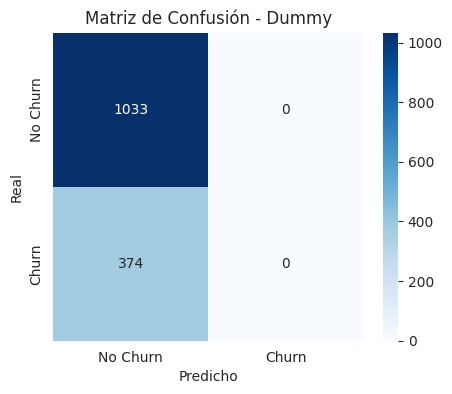


📊 ÁRBOL DE DECISIÓN
----------------------------------------
              precision    recall  f1-score   support

    No Churn       0.86      0.79      0.82      1033
       Churn       0.52      0.63      0.57       374

    accuracy                           0.75      1407
   macro avg       0.69      0.71      0.70      1407
weighted avg       0.77      0.75      0.76      1407



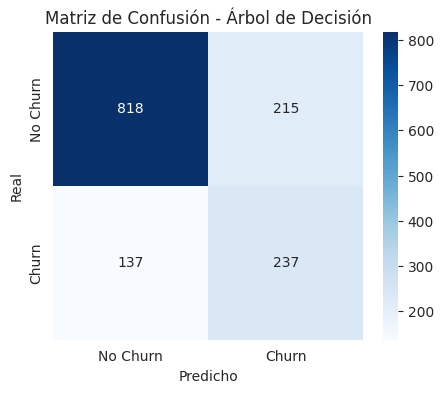


📊 ÁRBOL DE DECISIÓN AJUSTADO
----------------------------------------
              precision    recall  f1-score   support

    No Churn       0.87      0.81      0.84      1033
       Churn       0.55      0.66      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.77      1407



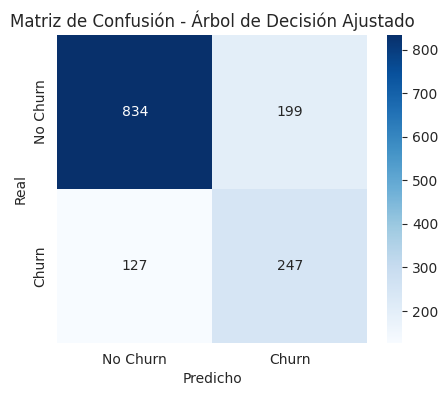


📊 RANDOM FOREST
----------------------------------------
              precision    recall  f1-score   support

    No Churn       0.87      0.81      0.84      1033
       Churn       0.56      0.66      0.61       374

    accuracy                           0.77      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.77      0.78      1407



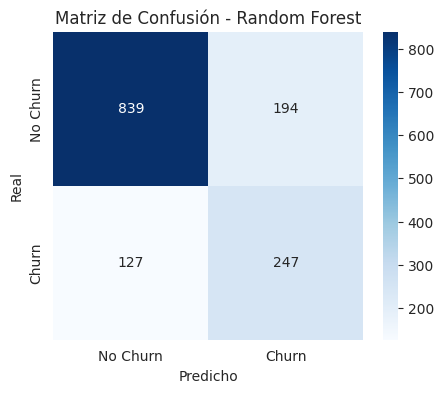


📋 RESUMEN DE MÉTRICAS (Validación)
                    Modelo   AUC  Accuracy  Precision  Recall  F1-score
                     Dummy 0.500     0.734      0.000   0.000     0.000
         Árbol de Decisión 0.762     0.750      0.524   0.634     0.574
Árbol de Decisión Ajustado 0.818     0.768      0.554   0.660     0.602
             Random Forest 0.830     0.772      0.560   0.660     0.606


In [87]:
print("🔍 EVALUACIÓN DETALLADA EN CONJUNTO DE VALIDACIÓN\n")
print("="*80)

for nombre, modelo in modelos.items():
    # Predicciones
    y_val_pred = modelo.predict(X_valid)
    y_val_proba = modelo.predict_proba(X_valid)[:, 1]

    # Métricas
    accuracy = accuracy_score(y_valid, y_val_pred)
    precision = precision_score(y_valid, y_val_pred, zero_division=0)
    recall = recall_score(y_valid, y_val_pred)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    auc = roc_auc_score(y_valid, y_val_proba)

    # Guardar resultados
    resultados_completos.append({
        'Modelo': nombre,
        'AUC': auc,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })

    # Reporte detallado
    print(f"\n📊 {nombre.upper()}")
    print("-" * 40)
    print(classification_report(y_valid, y_val_pred, target_names=['No Churn', 'Churn'], zero_division=0))

    # Matriz de confusión
    cm = confusion_matrix(y_valid, y_val_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.ylabel('Real')
    plt.xlabel('Predicho')
    plt.show()

# Convertir a DataFrame
df_completo = pd.DataFrame(resultados_completos).round(3)
print("\n" + "📋 RESUMEN DE MÉTRICAS (Validación)")
print(df_completo.to_string(index=False))

####  Elegir el mejor modelo por AUC

In [90]:
# mejor_fila = df_valid.loc[df_valid['AUC'].idxmax()]
mejor_fila = df_completo.loc[df_completo['AUC'].idxmax()]
mejor_modelo_nombre = mejor_fila['Modelo']
mejor_modelo = modelos[mejor_modelo_nombre]

print(f"\n✅ MEJOR MODELO: {mejor_modelo_nombre} (AUC = {mejor_fila['AUC']})")


✅ MEJOR MODELO: Random Forest (AUC = 0.83)


#### Evaluar el mejor modelo en TEST (una sola vez)

In [91]:
# Predecir en test
y_test_pred = mejor_modelo.predict(X_test)
y_test_proba = mejor_modelo.predict_proba(X_test)[:, 1]

# Calcular métricas finales
final_auc = roc_auc_score(y_test, y_test_proba)
final_acc = accuracy_score(y_test, y_test_pred)
final_recall = recall_score(y_test, y_test_pred)
final_precision = precision_score(y_test, y_test_pred, zero_division=0)

print("\n" + "🏆 EVALUACIÓN FINAL EN CONJUNTO DE TEST (NO VISTO)")
print("="*50)
print(f"Modelo: {mejor_modelo_nombre}")
print(f"AUC:        {final_auc:.3f}")
print(f"Accuracy:   {final_acc:.3f}")
print(f"Recall:     {final_recall:.3f}")
print(f"Precision:  {final_precision:.3f}")
print("="*50)


🏆 EVALUACIÓN FINAL EN CONJUNTO DE TEST (NO VISTO)
Modelo: Random Forest
AUC:        0.836
Accuracy:   0.765
Recall:     0.709
Precision:  0.544


####  Tabla comparativa final:

In [96]:
df_final = df_completo.copy()
df_final['En_Test'] = df_final['Modelo'] == mejor_modelo_nombre
df_final['En_Test'] = df_final['En_Test'].map({True: '✅', False: ''})

print("\n📊 RESUMEN FINAL (Validación + Mejor en Test)")
print(df_final[['Modelo', 'AUC', 'Accuracy', 'Recall', 'Precision', 'En_Test']].to_string(index=False))


📊 RESUMEN FINAL (Validación + Mejor en Test)
                    Modelo   AUC  Accuracy  Recall  Precision En_Test
                     Dummy 0.500     0.734   0.000      0.000        
         Árbol de Decisión 0.762     0.750   0.634      0.524        
Árbol de Decisión Ajustado 0.818     0.768   0.660      0.554        
             Random Forest 0.830     0.772   0.660      0.560       ✅
